# Multi-layer Perceptron Regression

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor
import numpy as np

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[1000]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.783, total=   0.5s
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.847, total=   0.6s
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.848, total=   0.7s
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.815, total=   1.0s
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.810, total=   1.1s
[CV] alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV]  alpha=0.1, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.838, total=   1.0s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.781, total=   0.4s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s


[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.874, total=   0.8s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s remaining:    0.0s


[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.827, total=   0.6s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.7s remaining:    0.0s


[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.834, total=   1.2s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 
[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.808, total=   0.7s
[CV] alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd 
[CV]  alpha=0.01, batch_size=20, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, max_iter=1000, solver=sgd, score=0.835, total=   1.0s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.6s finished


***GRIDSEARCH RESULTS***
Best score: 0.827271 using {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
0.825714 (0.030512) with: {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
0.820606 (0.012183) with: {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
0.827271 (0.037871) with: {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
0.825898 (0.012530) with: {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}


0.8269113226216246

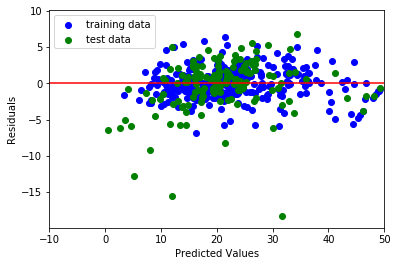

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [3]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.5642503690041567
MSE train:  4.151075783672852
RMSE train:  2.0374189023548523
r2:  0.9761009962354855
MAE test:  2.435449368359512
MSE test:  12.897373159210598
RMSE test:  3.591291294118398
r2:  0.9093466460165917


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y)

regressor = MLPRegressor(hidden_layer_sizes= (15,5), 
                         alpha= 0.01,
                         max_iter = 5000)

regressor.fit(X_train,y_train)
y_train_pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)


In [8]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_train, y_train_pred)))

print("MAE test: ", metrics.mean_absolute_error(y_test,y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_test, y_pred)))

MAE train:  1.5317278094129982
MSE train:  4.052327786221732
RMSE train:  2.0130394398078075
r2:  0.9753138538198755
MAE test:  2.323556610115393
MSE test:  12.762716306817106
RMSE test:  3.5724944096271316
r2:  0.9242897956933346
